In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import dataset
data = '314_Data set_จำนวนสาขา - ไฟนอล.xlsx'
df = pd.read_excel(data)
df

,province,id_province,amount_store,amount_pop,area,density_pop,income_average,amount_tourist,tourist_income,income_min_pop,branch_CJ_store,branch_FAM_store,purchasing_power,income_average_per_branch
0,Chonburi,18,799,1583672,4363.00,362.98,32355.77,2813743,11928,354,62,80,579.44,63360700
1,Nakhon Pathom,28,262,922171,2168.33,425.29,38788.18,952854,1235,353,53,8,214.16,20776600
2,Nonthaburi,33,526,1288637,622.30,2070.75,41129.42,579109,720,353,30,28,1106.61,41711800
3,Pathum Thani,38,437,1190060,1525.86,779.93,39506.99,426693,504,353,15,41,517.29,34654100
4,Pattani,41,40,729581,1940.36,376.00,20691.69,70515,211,328,0,0,416.84,3172000
5,Phuket,51,217,418785,543.03,771.19,33328.16,1148304,21320,354,0,83,141.42,17208100
6,Samut Prakan,69,524,1356449,1004.09,1350.92,32913.65,458101,690,353,43,41,333.46,41553200
7,Samut Songkhram,70,42,190842,416.71,457.98,24964.12,881906,935,338,12,1,408.38,3330600
8,Samut Sakhon,71,203,586789,872.35,672.66,27590.85,134414,142,353,48,33,490.34,16097900


In [4]:
df.info() #แสดงสรุปข้อมูลรวมถึงเพื่อดู Null value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   province                   9 non-null      object 
 1   id_province                9 non-null      int64  
 2   amount_store               9 non-null      int64  
 3   amount_pop                 9 non-null      int64  
 4   area                       9 non-null      float64
 5   density_pop                9 non-null      float64
 6   income_average             9 non-null      float64
 7   amount_tourist             9 non-null      int64  
 8   tourist_income             9 non-null      int64  
 9   income_min_pop             9 non-null      int64  
 10  branch_CJ_store            9 non-null      int64  
 11  branch_FAM_store           9 non-null      int64  
 12  purchasing_power           9 non-null      float64
 13  income_average_per_branch  9 non-null      int64  
dty

In [5]:
df.dtypes

province                      object
id_province                    int64
amount_store                   int64
amount_pop                     int64
area                         float64
density_pop                  float64
income_average               float64
amount_tourist                 int64
tourist_income                 int64
income_min_pop                 int64
branch_CJ_store                int64
branch_FAM_store               int64
purchasing_power             float64
income_average_per_branch      int64
dtype: object

In [6]:
df['id_province'] =  df['id_province'].astype(str) 
df['tourist_income'] = df['tourist_income'].astype(float)

In [7]:
df.dtypes

province                      object
id_province                   object
amount_store                   int64
amount_pop                     int64
area                         float64
density_pop                  float64
income_average               float64
amount_tourist                 int64
tourist_income               float64
income_min_pop                 int64
branch_CJ_store                int64
branch_FAM_store               int64
purchasing_power             float64
income_average_per_branch      int64
dtype: object

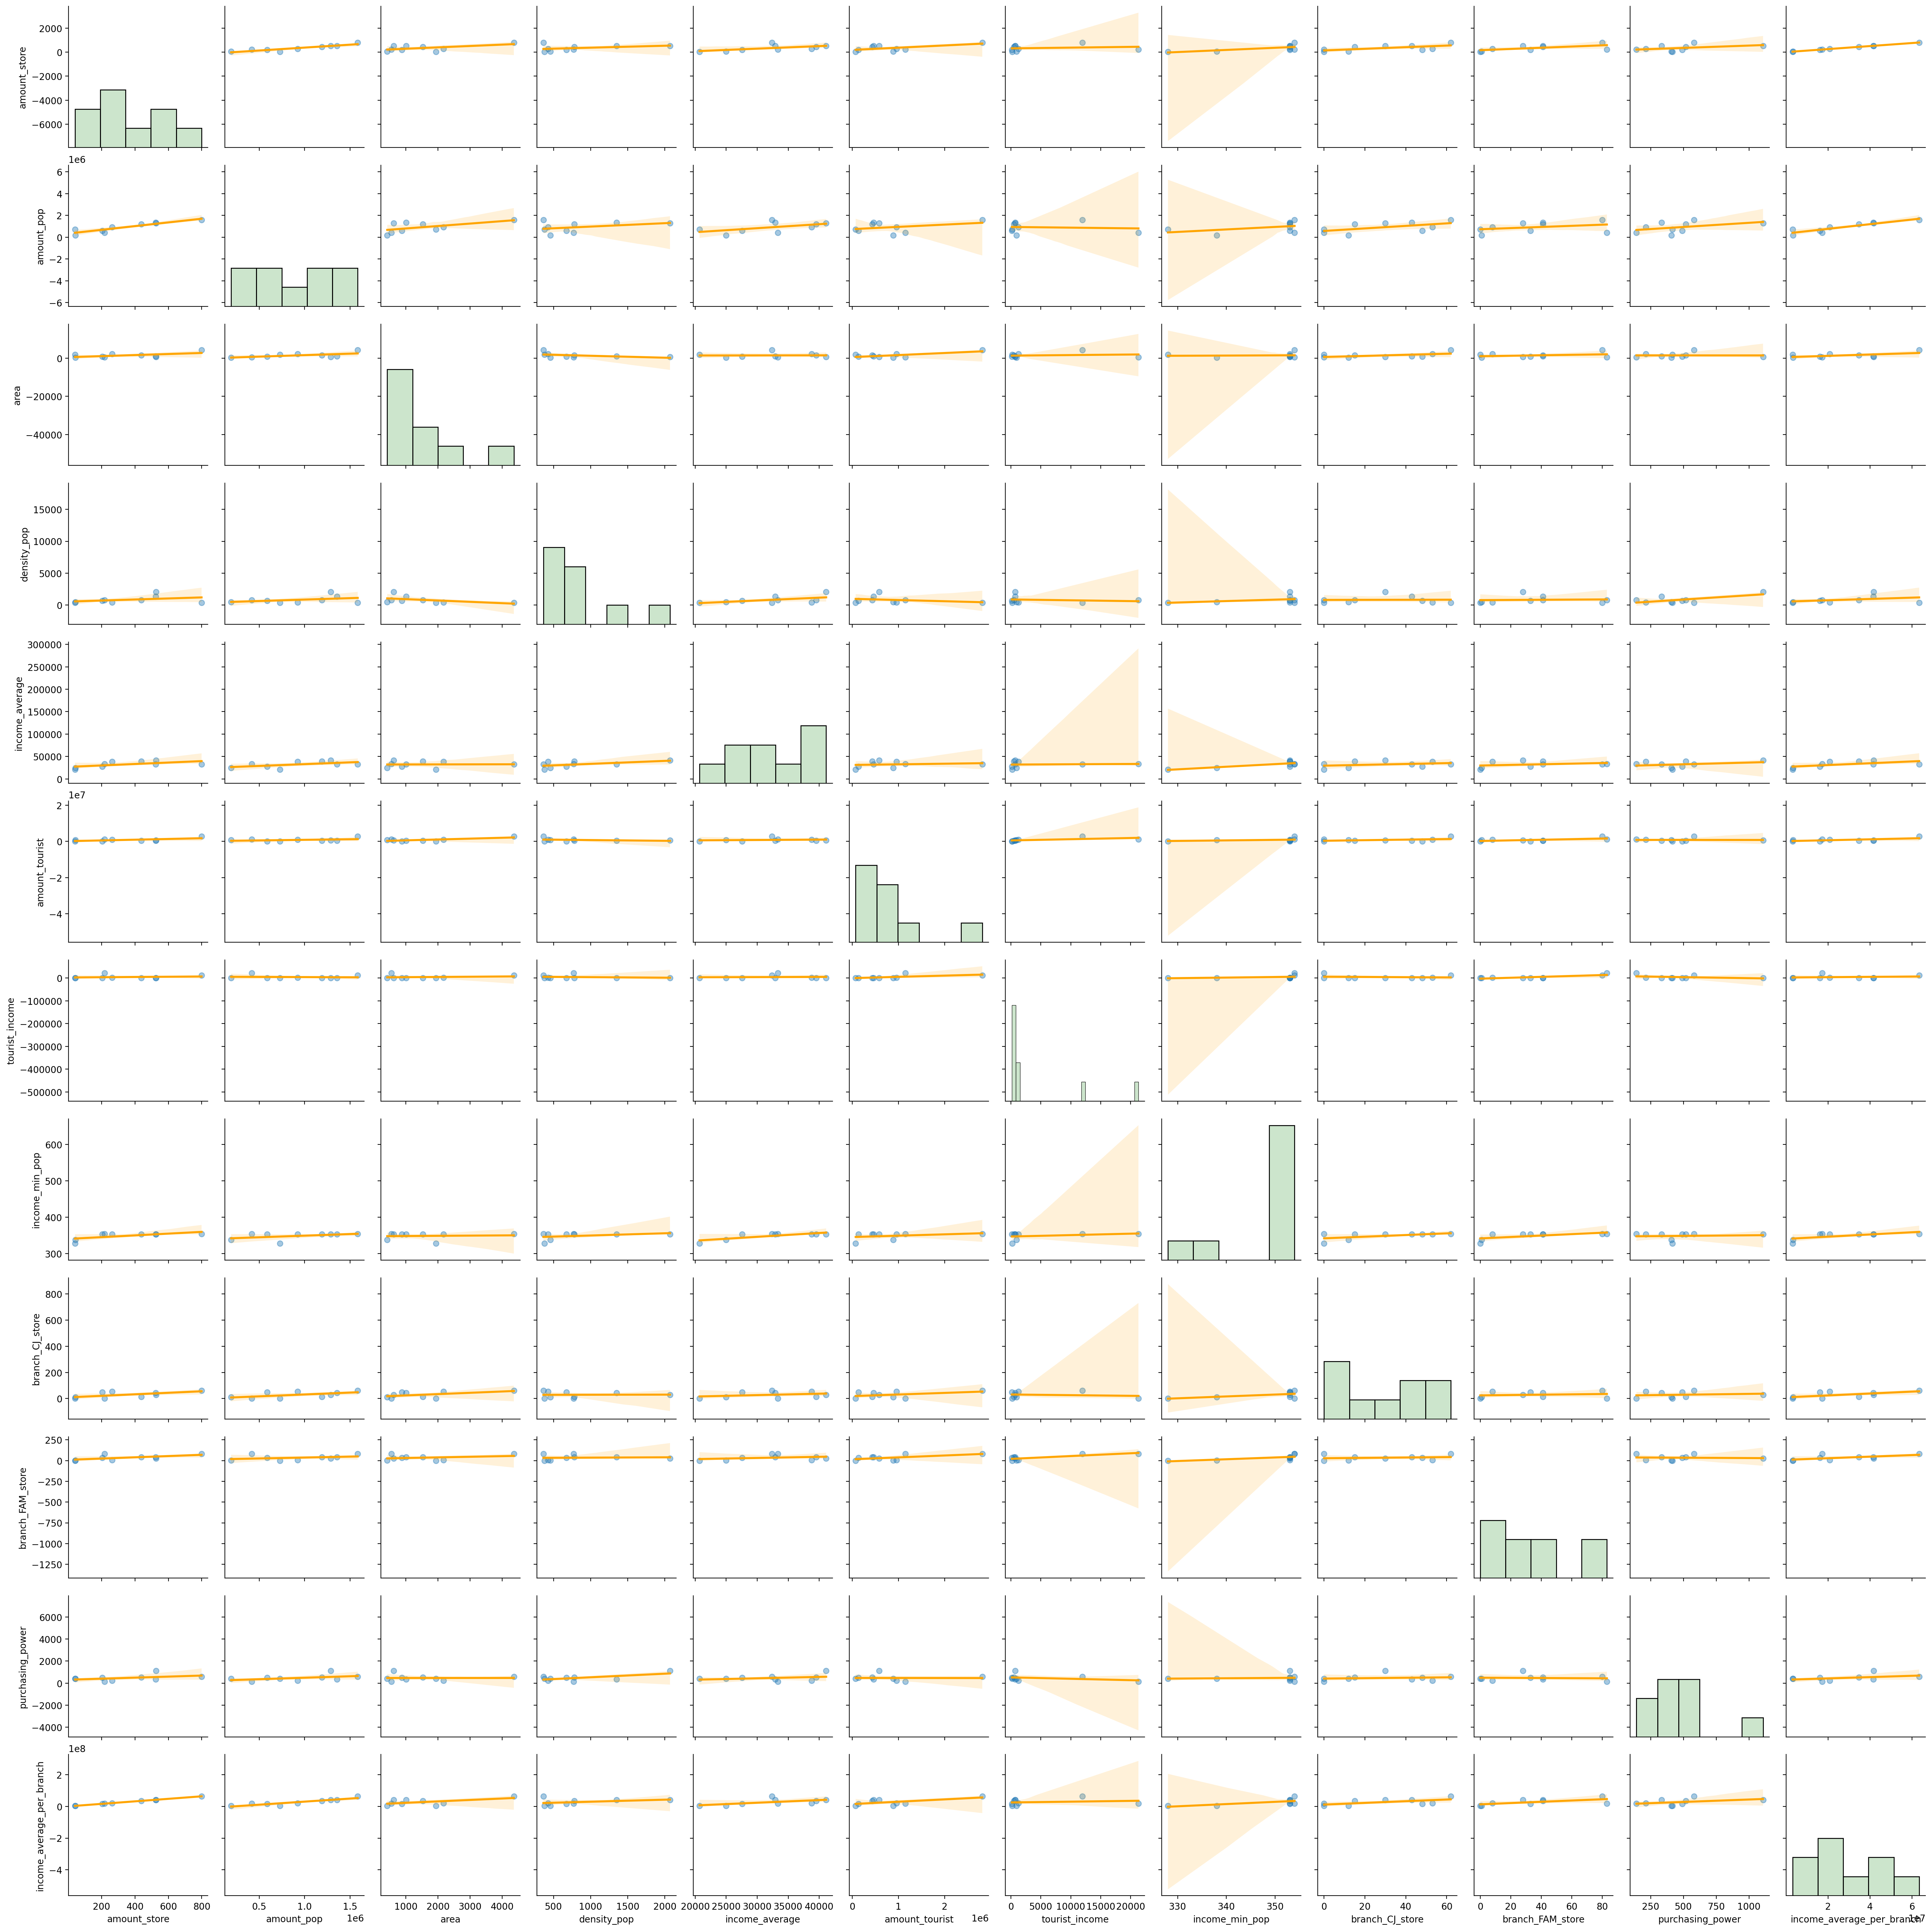

In [8]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2}); #plotความสัมพันธ์แต่ละตัวแปร

In [9]:
df.province .value_counts()

Chonburi            1
Nakhon Pathom       1
Nonthaburi          1
Pathum Thani        1
Pattani             1
Phuket              1
Samut Prakan        1
Samut Songkhram     1
Samut Sakhon        1
Name: province, dtype: int64

In [10]:
df.columns # รายได้นักท่องเที่ยว ความหนาแน่นของประชากร จำนวนนักท่องเที่ยว  ประชากร  จำนวนยแฟมมิลี่มาร์ท

Index(['province', 'id_province', 'amount_store', 'amount_pop', 'area',
       'density_pop', 'income_average', 'amount_tourist', 'tourist_income',
       'income_min_pop', 'branch_CJ_store', 'branch_FAM_store',
       'purchasing_power', 'income_average_per_branch'],
      dtype='object')

In [11]:
df =  df.drop([ 'income_average' ,'income_min_pop','area','id_province',
       'branch_CJ_store', 'purchasing_power', 'income_average_per_branch'], axis=1)

In [12]:
df.columns 

Index(['province', 'amount_store', 'amount_pop', 'density_pop',
       'amount_tourist', 'tourist_income', 'branch_FAM_store'],
      dtype='object')

In [13]:
df.head()

,province,amount_store,amount_pop,density_pop,amount_tourist,tourist_income,branch_FAM_store
0,Chonburi,799,1583672,362.98,2813743,11928.0,80
1,Nakhon Pathom,262,922171,425.29,952854,1235.0,8
2,Nonthaburi,526,1288637,2070.75,579109,720.0,28
3,Pathum Thani,437,1190060,779.93,426693,504.0,41
4,Pattani,40,729581,376.00,70515,211.0,0


# Scikit-learn: KMeans Clustering

<AxesSubplot: xlabel='amount_tourist', ylabel='amount_store'>

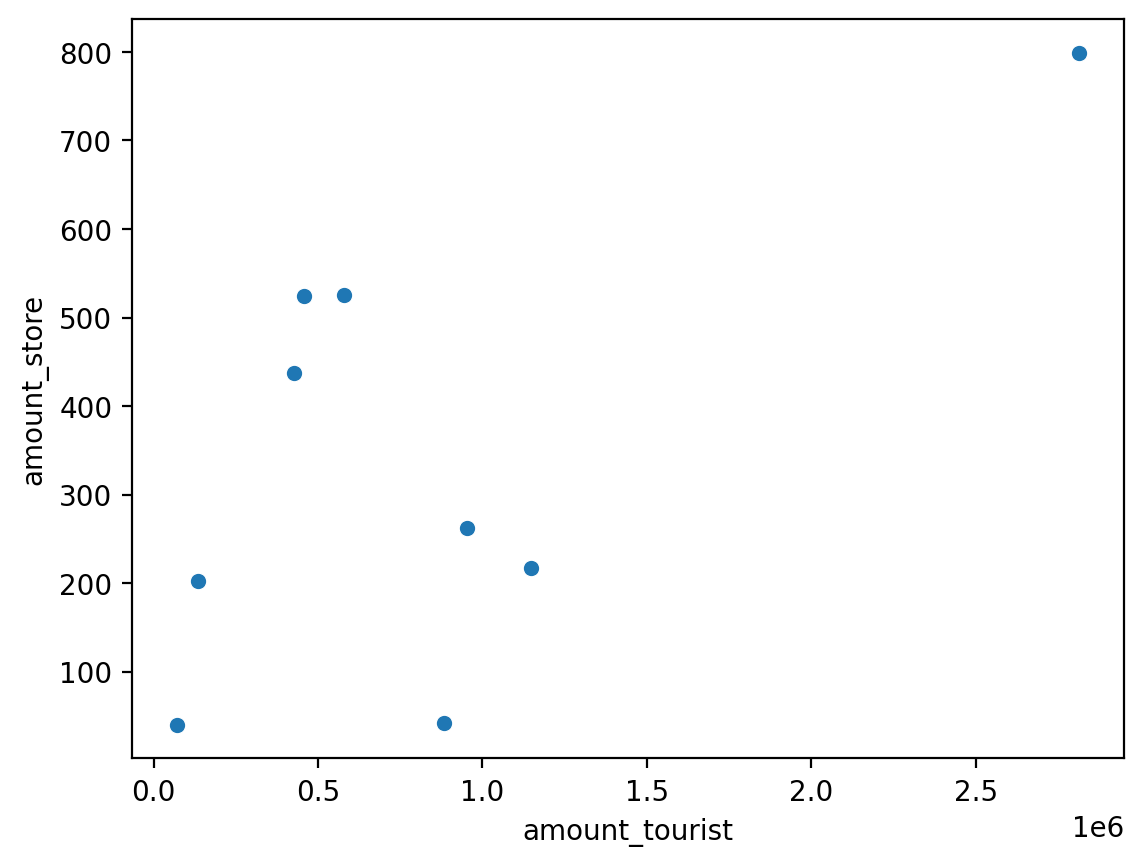

In [14]:
sns.scatterplot(data=df, x='amount_tourist', y='amount_store')

<AxesSubplot: xlabel='amount_tourist', ylabel='amount_store'>

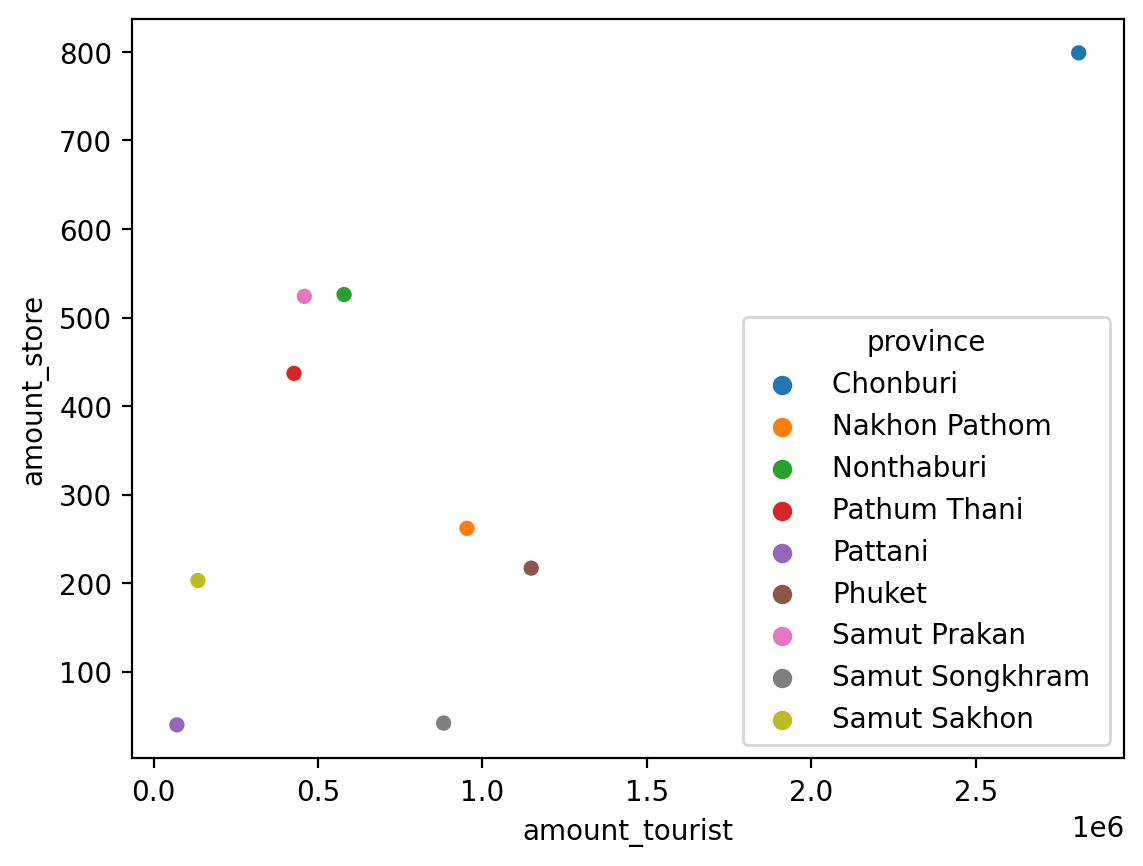

In [15]:
sns.scatterplot(data=df, x='amount_tourist', y='amount_store', hue='province')

In [16]:
X = df.drop('amount_store', axis=1)

In [17]:
df.columns

Index(['province', 'amount_store', 'amount_pop', 'density_pop',
       'amount_tourist', 'tourist_income', 'branch_FAM_store'],
      dtype='object')

In [18]:
feature_cols = ['amount_pop', 'density_pop', 'amount_tourist',
       'tourist_income', 'branch_FAM_store']
X = df[feature_cols]
X.head()

,amount_pop,density_pop,amount_tourist,tourist_income,branch_FAM_store
0,1583672,362.98,2813743,11928.0,80
1,922171,425.29,952854,1235.0,8
2,1288637,2070.75,579109,720.0,28
3,1190060,779.93,426693,504.0,41
4,729581,376.00,70515,211.0,0


In [19]:
y = df.amount_pop
y.head()

0    1583672
1     922171
2    1288637
3    1190060
4     729581
Name: amount_pop, dtype: int64

In [20]:
X.shape

(9, 5)

In [21]:
y.shape

(9,)

In [23]:
from sklearn.cluster import KMeans

In [33]:
model=KMeans(n_clusters=3)
y_kmean = model.fit_predict(X)

In [34]:
df['cluster'] = y_kmean

In [35]:
df.sample

<bound method NDFrame.sample of            province  amount_store  amount_pop  density_pop  amount_tourist  \
0         Chonburi            799     1583672       362.98         2813743   
1    Nakhon Pathom            262      922171       425.29          952854   
2       Nonthaburi            526     1288637      2070.75          579109   
3     Pathum Thani            437     1190060       779.93          426693   
4           Pattani            40      729581       376.00           70515   
5            Phuket           217      418785       771.19         1148304   
6     Samut Prakan            524     1356449      1350.92          458101   
7  Samut Songkhram             42      190842       457.98          881906   
8     Samut Sakhon            203      586789       672.66          134414   

   tourist_income  branch_FAM_store  cluster  
0         11928.0                80        0  
1          1235.0                 8        2  
2           720.0                28        1  

<AxesSubplot: xlabel='amount_tourist', ylabel='amount_store'>

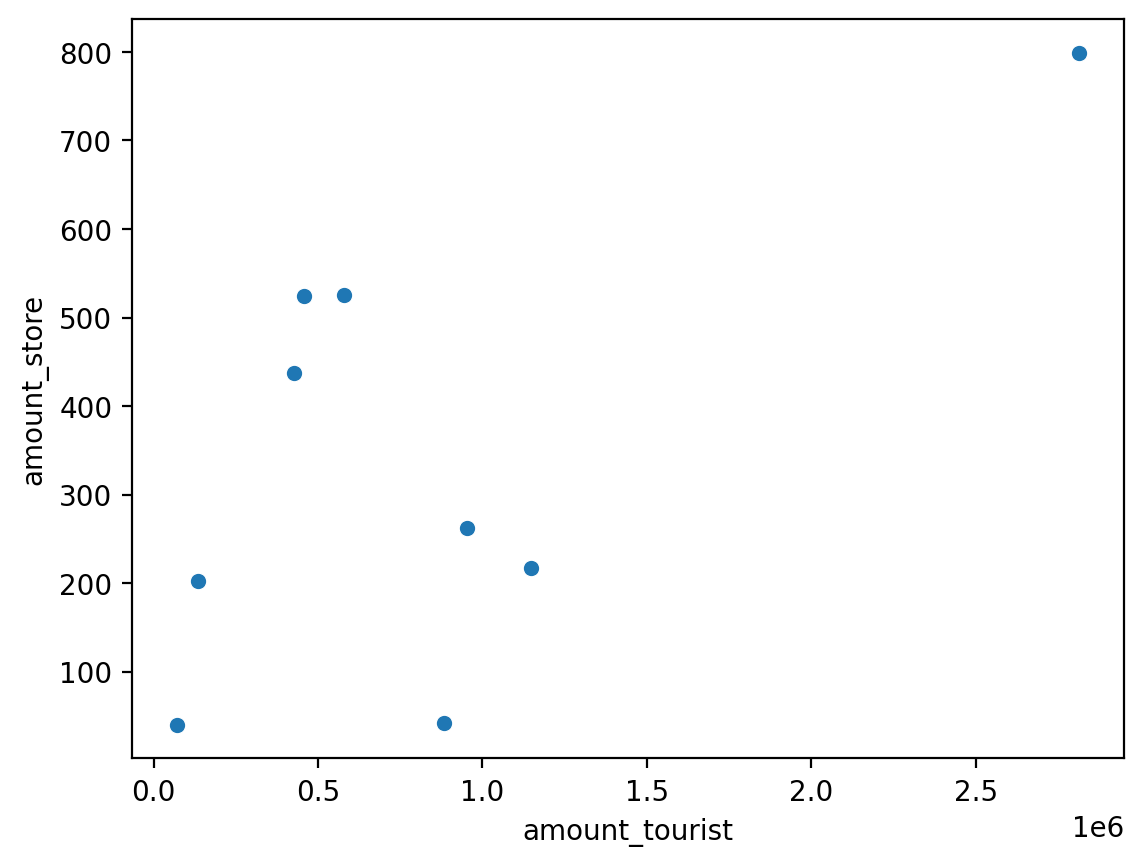

In [36]:
sns.scatterplot(data=df, x='amount_tourist', y='amount_store')

<AxesSubplot: xlabel='amount_tourist', ylabel='amount_store'>

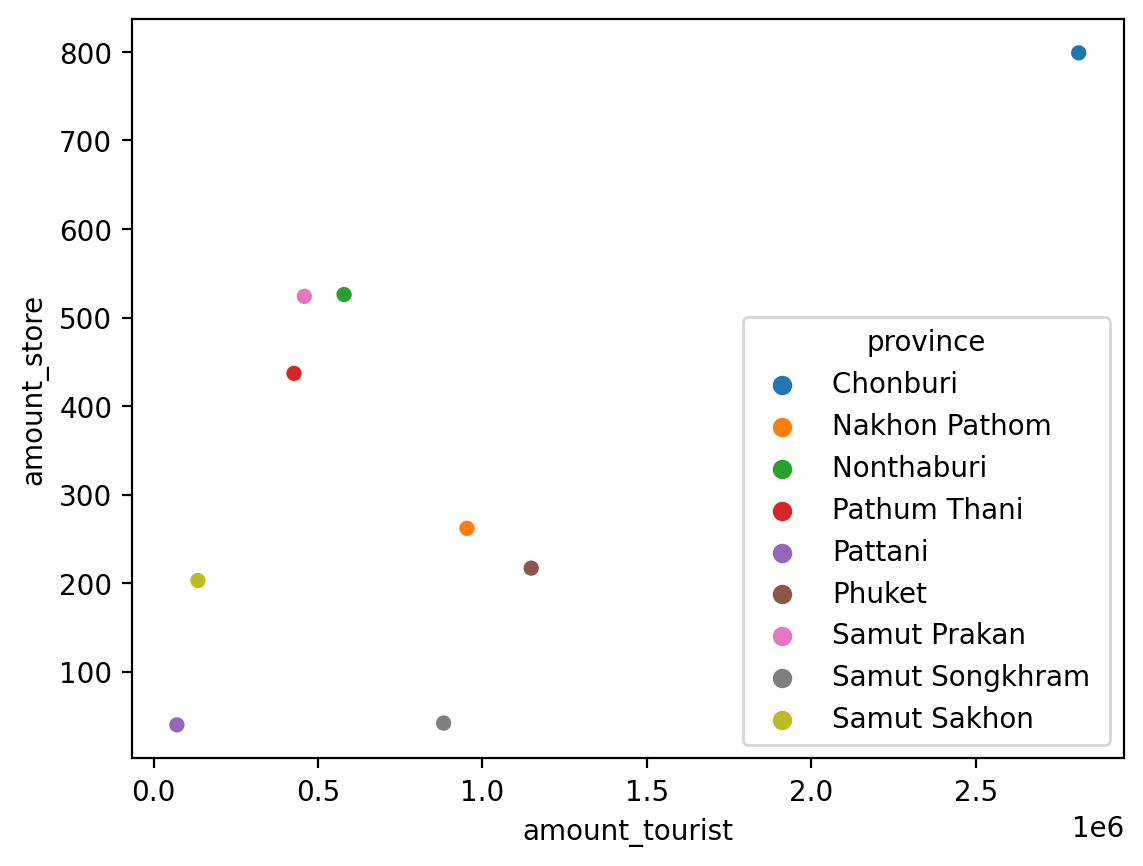

In [37]:
sns.scatterplot(data=df, x='amount_tourist', y='amount_store', hue='province')

<AxesSubplot: xlabel='amount_store', ylabel='amount_tourist'>

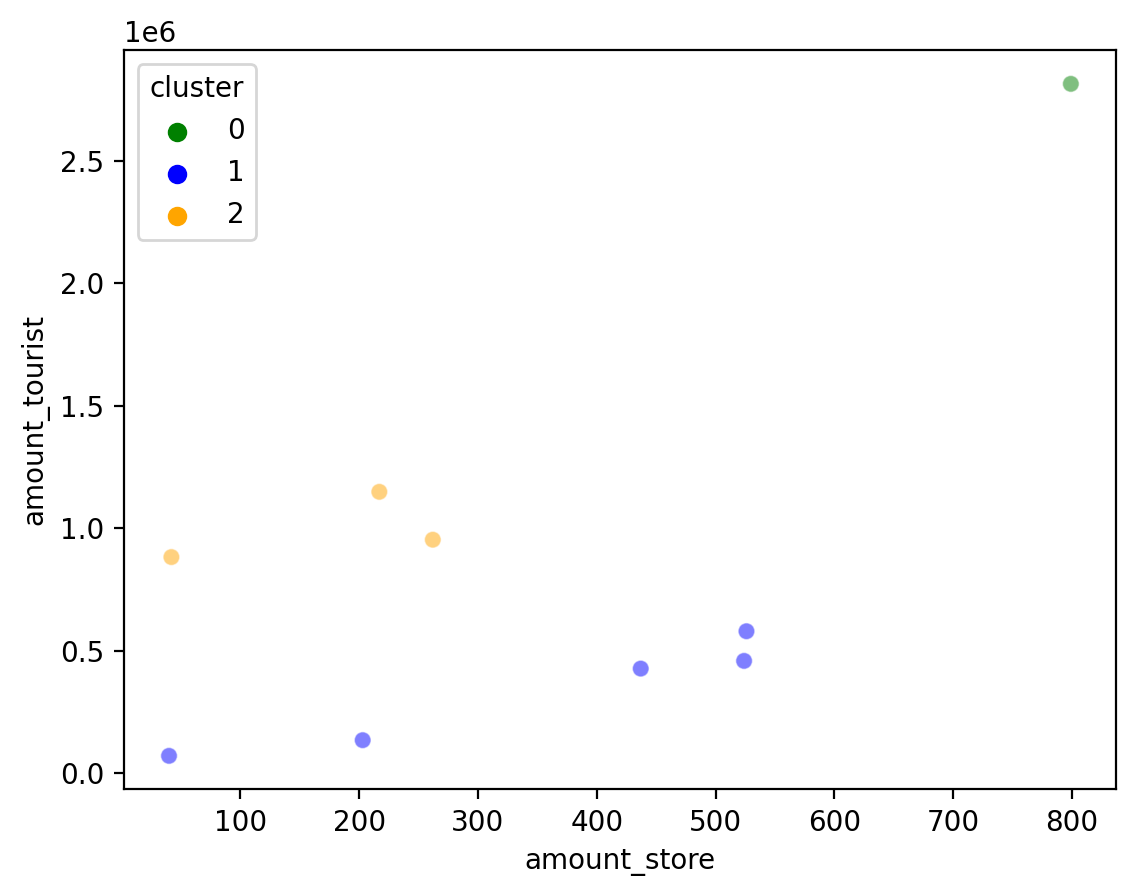

In [38]:
### ccluster 0-2 is more to less

sns.scatterplot(data=df, x='amount_store', y='amount_tourist', hue='cluster', alpha=.5, palette=['green', 'blue', 'orange']) # ,'red','black'
#plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='.1', marker='D')

In [39]:
df[df.cluster==0] # top 3 is ภูเก็ต  สมุทรสงคราม  นครปฐม  or  สมุทรสงคราม  นครปฐม ภูเก็ต ขึ้นอยู่กับเหตุผลที่มาสัพพอรต์ 

,province,amount_store,amount_pop,density_pop,amount_tourist,tourist_income,branch_FAM_store,cluster
0,Chonburi,799,1583672,362.98,2813743,11928.0,80,0


In [40]:
df[df.cluster==1]

,province,amount_store,amount_pop,density_pop,amount_tourist,tourist_income,branch_FAM_store,cluster
2,Nonthaburi,526,1288637,2070.75,579109,720.0,28,1
3,Pathum Thani,437,1190060,779.93,426693,504.0,41,1
4,Pattani,40,729581,376.00,70515,211.0,0,1
6,Samut Prakan,524,1356449,1350.92,458101,690.0,41,1
8,Samut Sakhon,203,586789,672.66,134414,142.0,33,1


In [41]:
df[df.cluster==2]

,province,amount_store,amount_pop,density_pop,amount_tourist,tourist_income,branch_FAM_store,cluster
1,Nakhon Pathom,262,922171,425.29,952854,1235.0,8,2
5,Phuket,217,418785,771.19,1148304,21320.0,83,2
7,Samut Songkhram,42,190842,457.98,881906,935.0,1,2


In [42]:
pvt = df.pivot_table(index='amount_store',columns=['cluster'],values='tourist_income',fill_value = 0, aggfunc='count')
pvt

cluster,0,1,2
amount_store,,,
40,0,1,0
42,0,0,1
203,0,1,0
217,0,0,1
262,0,0,1
437,0,1,0
524,0,1,0
526,0,1,0
799,1,0,0


In [43]:
model.cluster_centers_ # centroids

array([[1.58367200e+06, 3.62980000e+02, 2.81374300e+06, 1.19280000e+04,
        8.00000000e+01],
       [1.03030320e+06, 1.05005200e+03, 3.33766400e+05, 4.53400000e+02,
        2.86000000e+01],
       [5.10599333e+05, 5.51486667e+02, 9.94354667e+05, 7.83000000e+03,
        3.06666667e+01]])

In [44]:
x_centroids = model.cluster_centers_[:, 0] #X

In [45]:
y_centroids = model.cluster_centers_[:, 1] #X

In [46]:
df['cluster']=model.labels_
df

,province,amount_store,amount_pop,density_pop,amount_tourist,tourist_income,branch_FAM_store,cluster
0,Chonburi,799,1583672,362.98,2813743,11928.0,80,0
1,Nakhon Pathom,262,922171,425.29,952854,1235.0,8,2
2,Nonthaburi,526,1288637,2070.75,579109,720.0,28,1
3,Pathum Thani,437,1190060,779.93,426693,504.0,41,1
4,Pattani,40,729581,376.00,70515,211.0,0,1
5,Phuket,217,418785,771.19,1148304,21320.0,83,2
6,Samut Prakan,524,1356449,1350.92,458101,690.0,41,1
7,Samut Songkhram,42,190842,457.98,881906,935.0,1,2
8,Samut Sakhon,203,586789,672.66,134414,142.0,33,1


In [47]:
model.labels_

array([0, 2, 1, 1, 1, 2, 1, 2, 1])